In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [ ]:
## Data Profiling & QA

# Load dataset
df = pd.read_csv(r"C:\Users\Desktop\visualizing_global_co2_data.csv") # replace with your actual file path

## Basic Structure & Metadata


df.head() # Preview the first few rows
df.shape # View dataset shape (rows, columns)
df.columns # List all columns
df.dtypes # Inspect data types
df.describe() # Summary statistics for numeric columns
df.describe(include="all") # Summary statistics for ALL columns (including object types)

## Check for Missing Values

df.isnull().sum() # Count missing values per column
(df.isnull().mean() * 100).round(2) # Percentage of missing values per column
df[df.isnull().any(axis=1)].head() # Count of rows with any missing values

## Check for Duplicates

df.duplicated().sum() # Count duplicate rows
df[df.duplicated()] # Display duplicate rows (if any)

## Check for Outliers & Data Ranges

df.describe().loc[["min", "max"]] # Check min/max for numeric columns
df["year"].min(), df["year"].max() # Check year range
df[df["co2"] < 0] ## Confirm no negative CO2 values

## Unique Values & Categories


df["country"].nunique() # Unique countries
df["country"].unique()[:20] # Sample of unique country names

## Data Health Summary

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])
print("Missing values:", df.isnull().sum().sum())
print("Duplicate rows:", df.duplicated().sum())
print("Year range:", df['year'].min(), "-", df['year'].max())
print("Negative CO2 values:", (df["co2"] < 0).sum())
print("Unique countries:", df["country"].nunique())

Rows: 50598
Columns: 79
Missing values: 2290339
Duplicate rows: 0
Year range: 1750 - 2021
Negative CO2 values: 0
Unique countries: 278


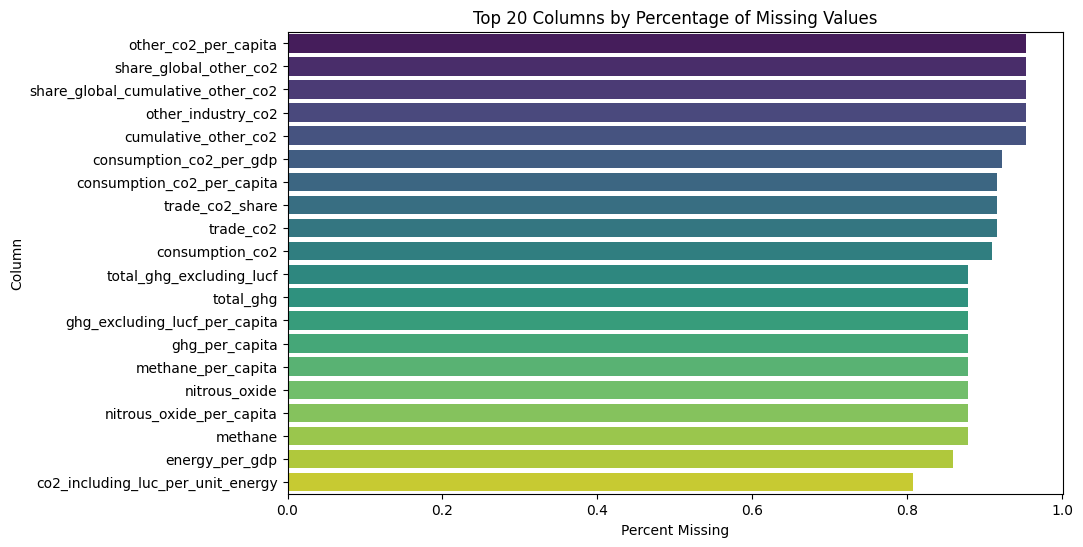

In [21]:
## Data Visualization Check - Top Missing Values

missing = df.isnull().mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing.values, y=missing.index, palette="viridis", hue=missing.index)
plt.title("Top 20 Columns by Percentage of Missing Values")
plt.xlabel("Percent Missing")
plt.ylabel("Column")
plt.show()

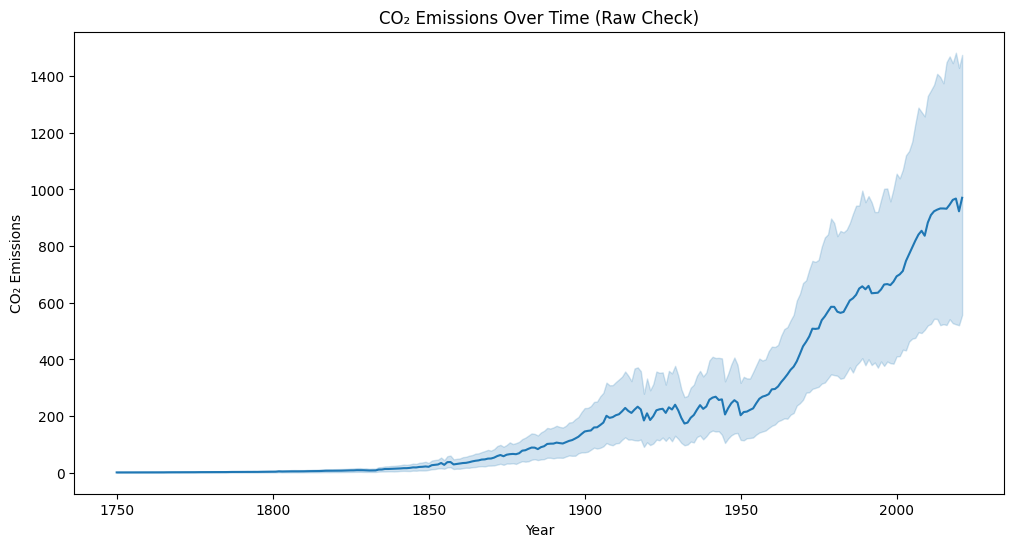

In [10]:
## Raw Data Visualization Check - CO₂ Emissions Over Time

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="co2")
plt.title("CO₂ Emissions Over Time (Raw Check)")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions")
plt.show()

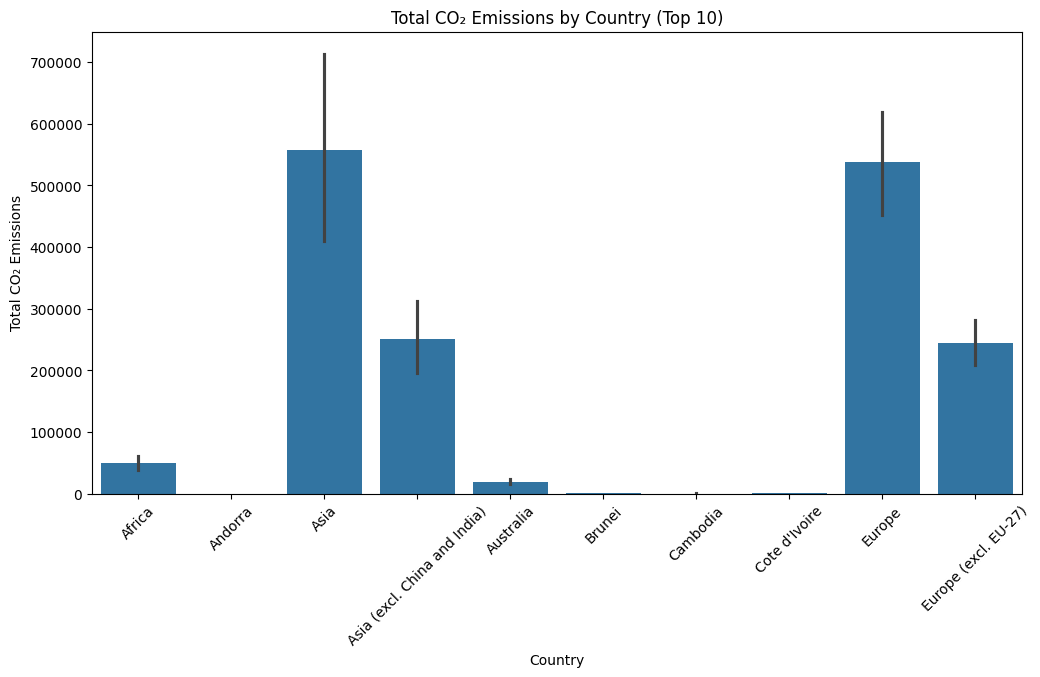

In [ ]:
## Raw Data Visualization Check - CO₂ Emissions by Country (Sample)

plt.figure(figsize=(12, 6))
sns.barplot(data=df[df["country"].isin(df["country"].value_counts().index[:10])], x="country", y="co2", estimator=np.sum)
plt.title("Total CO₂ Emissions by Country (Top 10)")
plt.xlabel("Country")
plt.ylabel("Total CO₂ Emissions")
plt.xticks(rotation=45)
plt.show()

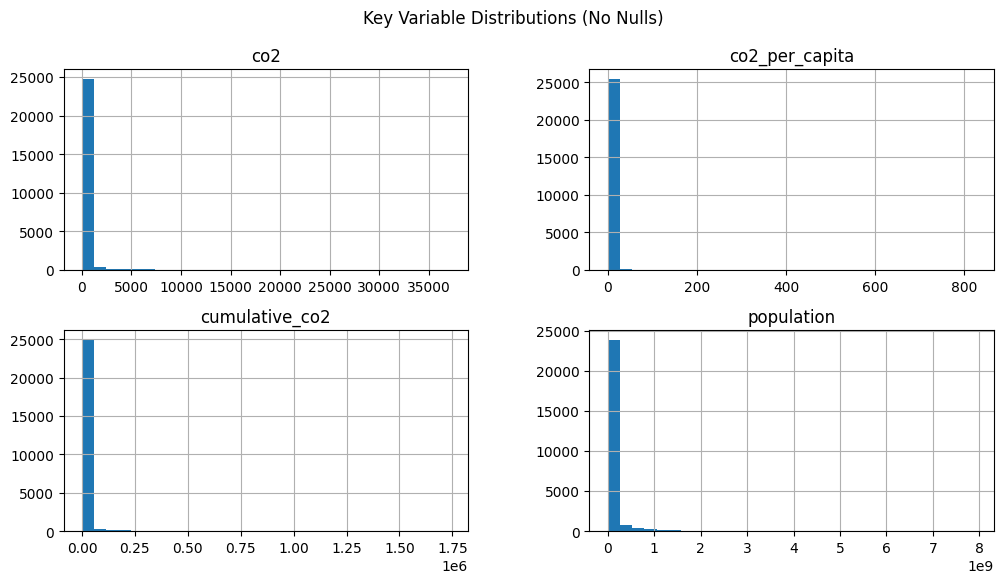

In [23]:
## Raw Data Visualization Check - Distribution Plots

cols = ["co2", "co2_per_capita", "cumulative_co2", "population"]

df[cols].dropna().hist(figsize=(12, 6), bins=30)
plt.suptitle("Key Variable Distributions (No Nulls)")
plt.show()